# Project Guideline



# Feature Description


obj_ID: Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha: Right Ascension angle (at J2000 epoch)

delta: Declination angle (at J2000 epoch)

u: Ultraviolet filter in the photometric system

g: Green filter in the photometric system

r: Red filter in the photometric system

i: Near Infrared filter in the photometric system

z: Infrared filter in the photometric system

run_ID: Run Number used to identify the specific scan

rereun_ID: Rerun Number to specify how the image was processed

cam_col: Camera column to identify the scanline within the run

field_ID: Field number to identify each field

spec_obj_ID: Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

class: object class (galaxy, star or quasar object)

redshift: redshift value based on the increase in wavelength

plate: plate ID, identifies each plate in SDSS

MJD: Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID: fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

# Load and Import Data.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/BIA/datasets/star_classification.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
df.shape

(100000, 18)

Dataset has 100000 rows and 18 columns

In [ ]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
df.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


there is no missing data in the dataset.

In [ ]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

there are three prediction classes in the data that is GALAXY,STAR,QSO

In [ ]:
df.sort_values('class')

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
58230,1.237655e+18,142.047959,51.231393,21.97755,21.53166,21.32114,20.86099,20.36108,2243,301,3,168,8.215889e+18,GALAXY,0.931503,7297,57040,718
58228,1.237655e+18,140.841355,50.692416,23.41943,22.03784,21.14735,20.79810,20.37284,2243,301,3,162,8.214576e+18,GALAXY,0.255631,7296,57046,36
58227,1.237656e+18,223.984760,-1.841606,22.18194,21.53138,20.52969,19.49590,18.90042,2379,301,4,99,4.526249e+18,GALAXY,0.509081,4020,55332,479
58226,1.237656e+18,216.754539,-1.946554,25.55715,20.90226,19.11438,18.38413,17.95209,2379,301,4,51,1.033706e+18,GALAXY,0.417001,918,52404,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46329,1.237656e+18,251.580659,38.559354,23.41423,21.04343,19.71153,19.26199,19.02872,2335,301,1,44,1.207866e+19,STAR,-0.000387,10728,58248,38
46330,1.237662e+18,237.215497,25.986546,17.54356,16.42303,15.91468,15.71449,15.61154,3900,301,1,677,2.768660e+18,STAR,-0.000482,2459,54544,261
46331,1.237647e+18,109.885032,0.048816,22.43742,19.55231,18.46435,18.01848,17.74893,308,301,3,24,8.388053e+18,STAR,0.000177,7450,56722,358
75082,1.237650e+18,158.030632,-1.411047,21.96090,20.85199,20.60211,20.44812,20.24777,1140,301,5,34,4.261743e+18,STAR,0.000930,3785,55273,769


In [ ]:
df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


In [ ]:
df.describe()
df.skew(numeric_only=True)

,0
obj_ID,0.398727
alpha,-0.028511
delta,0.175079
u,-313.849242
g,-314.276695
r,-0.507858
i,-0.404167
z,-314.759419
run_ID,0.398711
rerun_ID,0.000000


# Visualization

([<matplotlib.patches.Wedge at 0x7d3db28c1070>,
 [Text(-0.3216272173789337, 1.051929623616088, 'GALAXY'),
  Text(-0.3239728375169962, -1.0512095892595283, 'STAR'),
  Text(0.9105456051052268, -0.6171763937672573, 'QSO')],
 [Text(-0.17543302766123656, 0.5737797946996842, '59%'),
  Text(-0.17671245682745243, -0.5733870486870154, '22%'),
  Text(0.49666123914830546, -0.3366416693275948, '19%')])

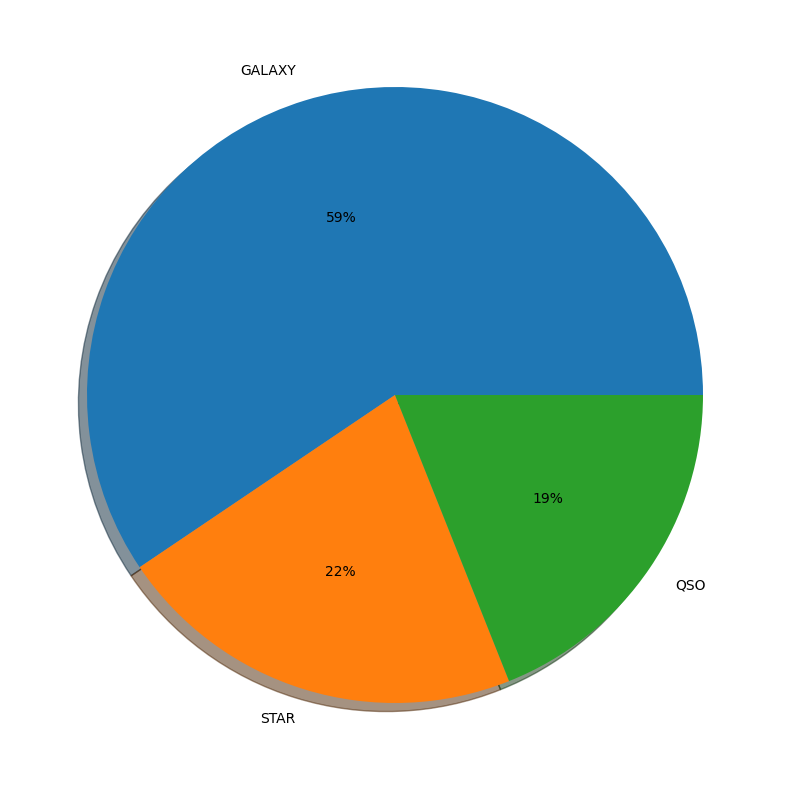

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(x=df['class'].value_counts(),labels=["GALAXY","STAR","QSO"],autopct="%1.f%%",shadow=True)

Galaxy class has majority with 59%
Star with 22%
QSO with 19%

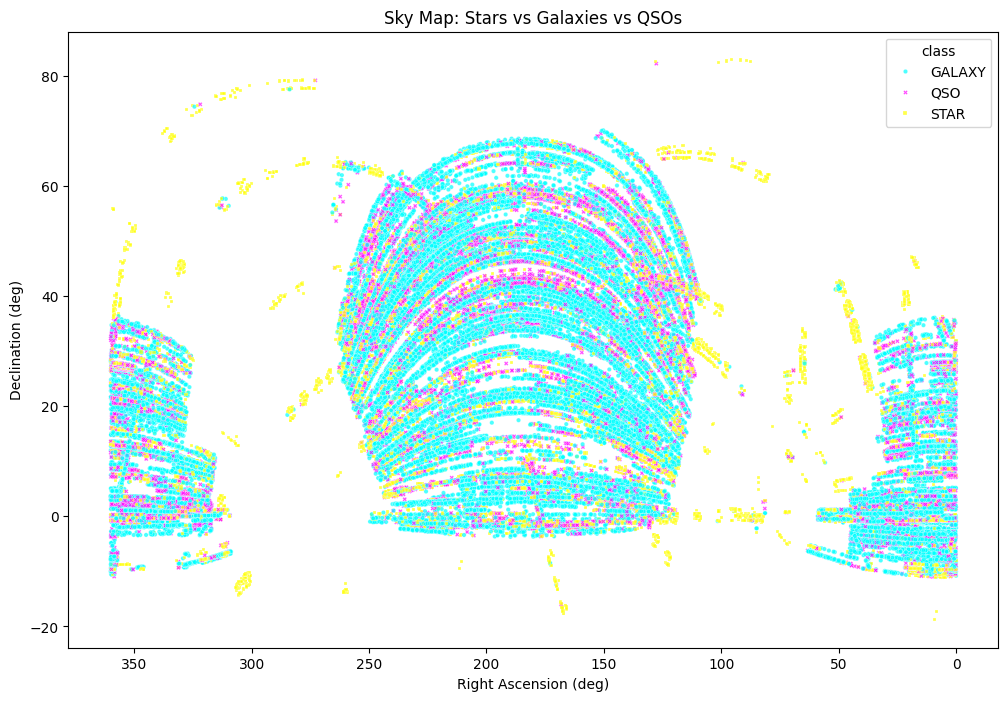

In [ ]:

plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df,
    x="alpha",
    y="delta",
    hue="class",          # STAR, GALAXY, QSO
    style="class",        # different markers
    palette={"STAR":"yellow", "GALAXY":"cyan", "QSO":"magenta"},
    s=10, alpha=0.7
)

plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Sky Map: Stars vs Galaxies vs QSOs")
plt.gca().invert_xaxis()   # Flip RA like in astronomy maps
plt.show()


This is not a telescope picture of the sky. it's more like plotting cities on a map of Earth using latitude/longitude.we get the inference that how the celestial body are present and positioned.

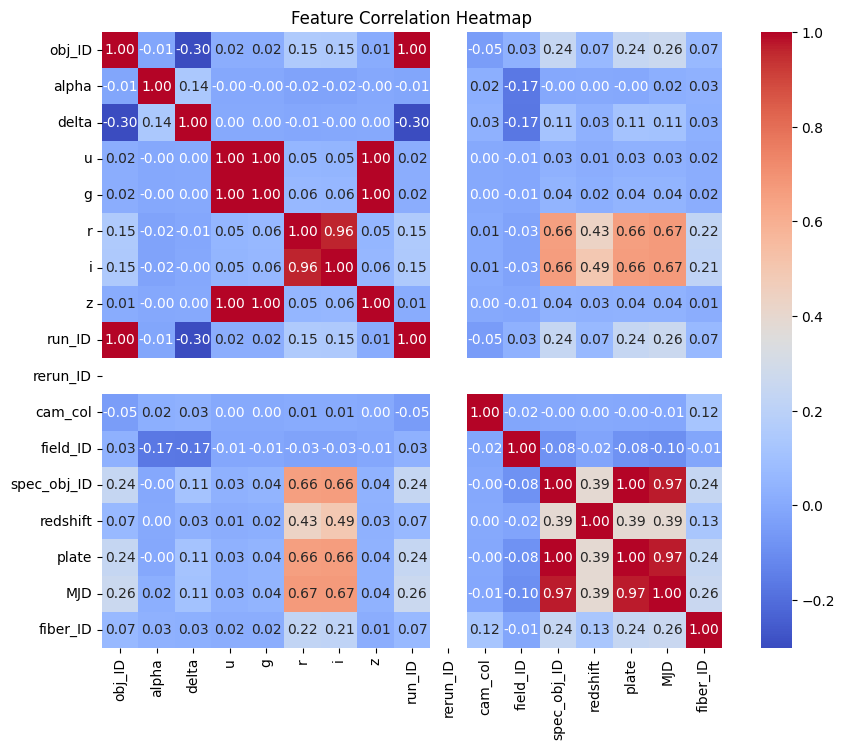

In [ ]:
plt.figure(figsize=(10,8))
numeric_features = df.select_dtypes(include='number')
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

There are many features with high correlation for example plate and MJD which can cause redundancy.

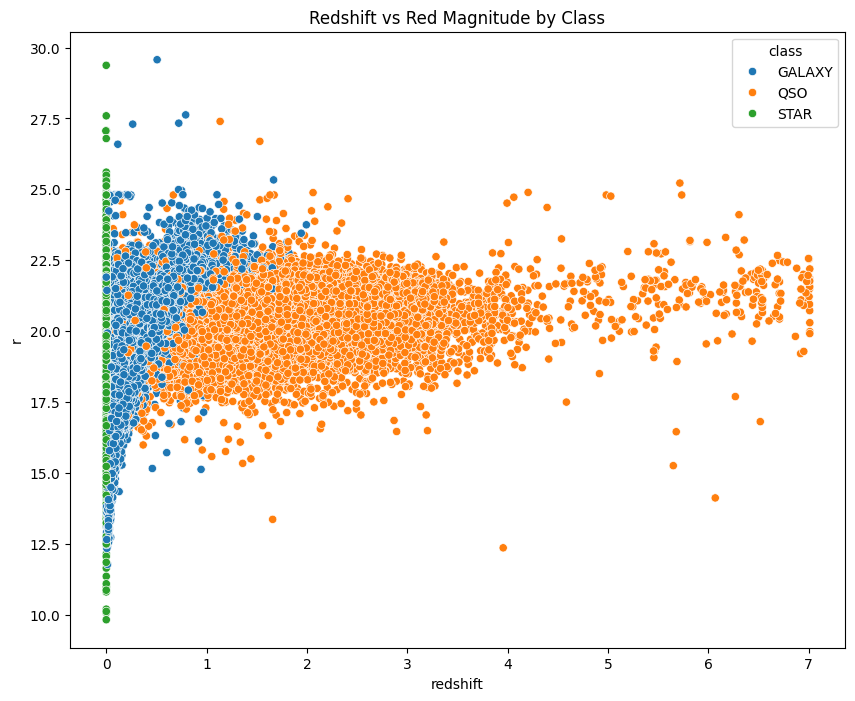

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='redshift', y='r', hue='class')
plt.title('Redshift vs Red Magnitude by Class')
plt.show()


Displays how distance/redshift relates to brightness for different classes.Patterns inform how redshift and brightness jointly contribute to object differentiation.



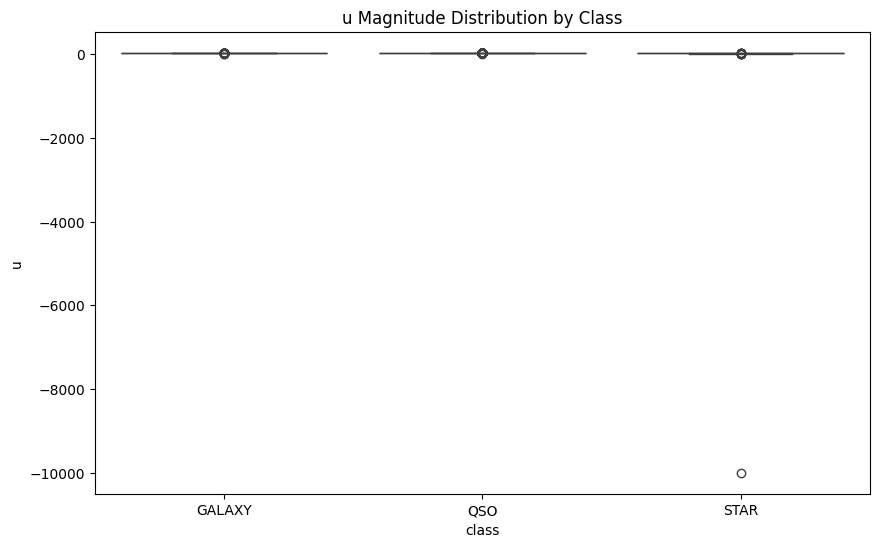

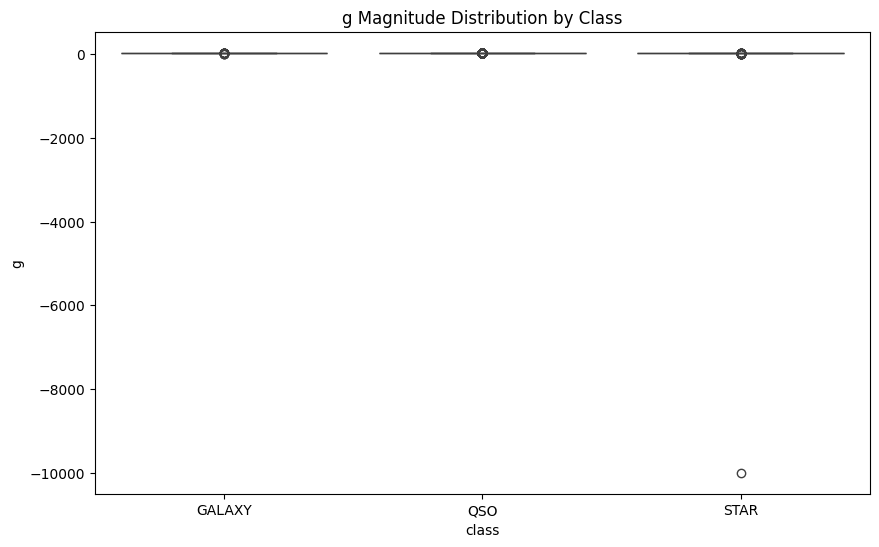

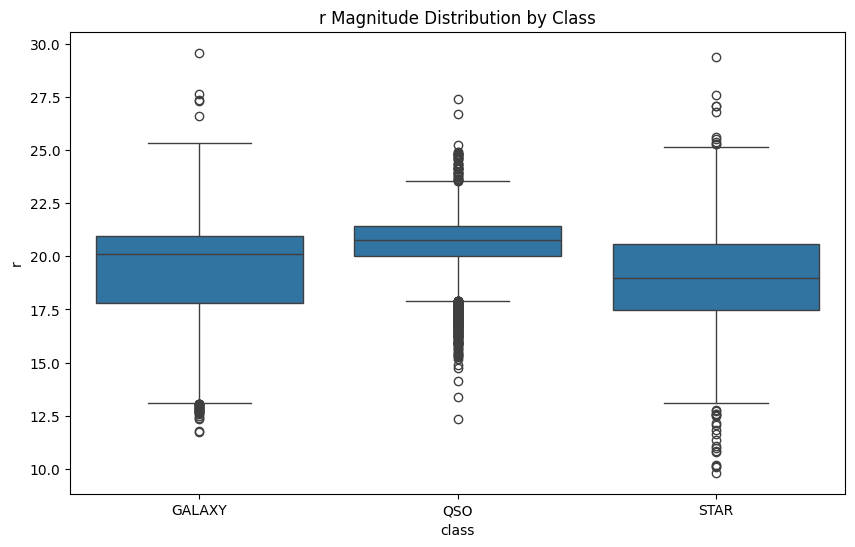

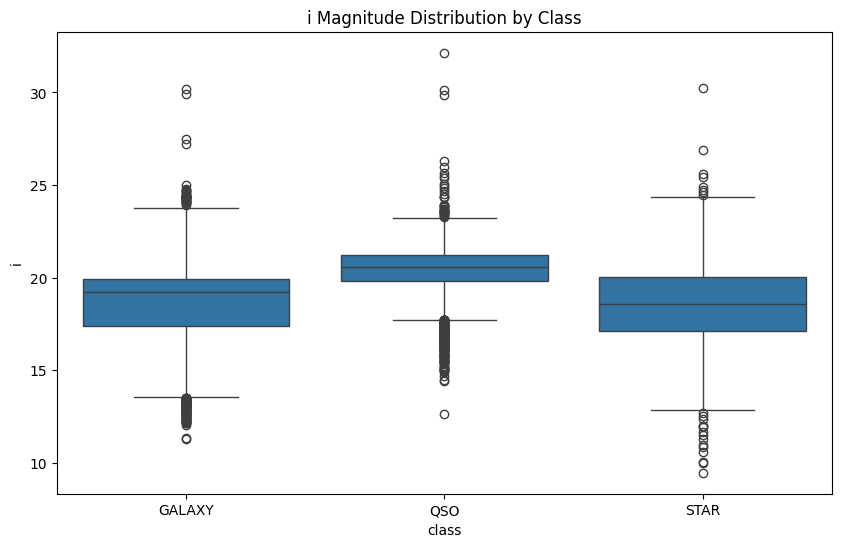

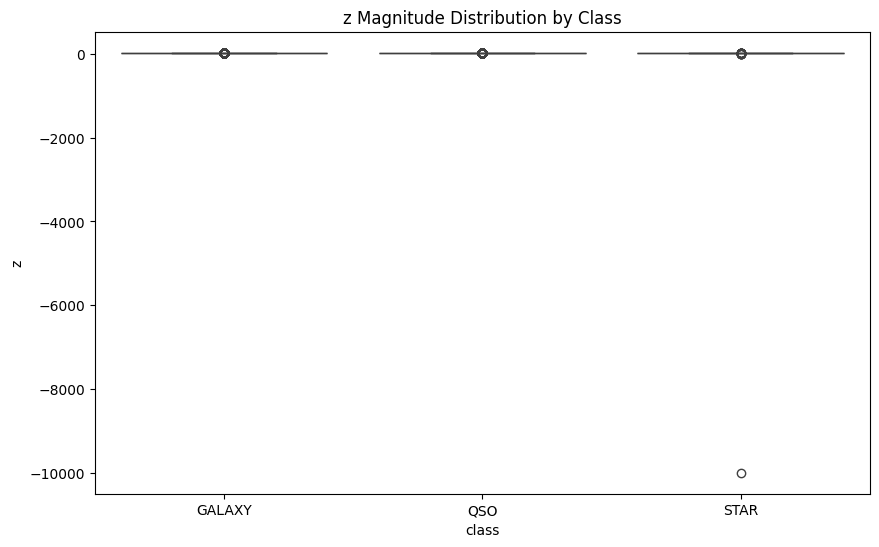

In [ ]:
for band in ['u', 'g', 'r', 'i', 'z']:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='class', y=band)
    plt.title(f'{band} Magnitude Distribution by Class')
    plt.show()

Reveal how brightness distributions vary across object types.

# Train_test_split

In [ ]:
X=df.drop('class',axis=1)
y=df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
y_pred

array(['QSO', 'STAR', 'GALAXY', ..., 'GALAXY', 'STAR', 'QSO'],
      dtype=object)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.97      0.98      0.98     11864
         QSO       0.95      0.92      0.93      3772
        STAR       1.00      1.00      1.00      4364

    accuracy                           0.97     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



In [ ]:
pd.DataFrame(index=X.columns,data=dt.feature_importances_,columns=['IMP FEATURE']).sort_values('IMP FEATURE')

,IMP FEATURE
rerun_ID,0.000000
cam_col,0.000190
run_ID,0.000314
obj_ID,0.000336
field_ID,0.000376
delta,0.000796
fiber_ID,0.000807
MJD,0.000901
alpha,0.000922
spec_obj_ID,0.001207


This are dataframe of features according to their importance which classifying the tree


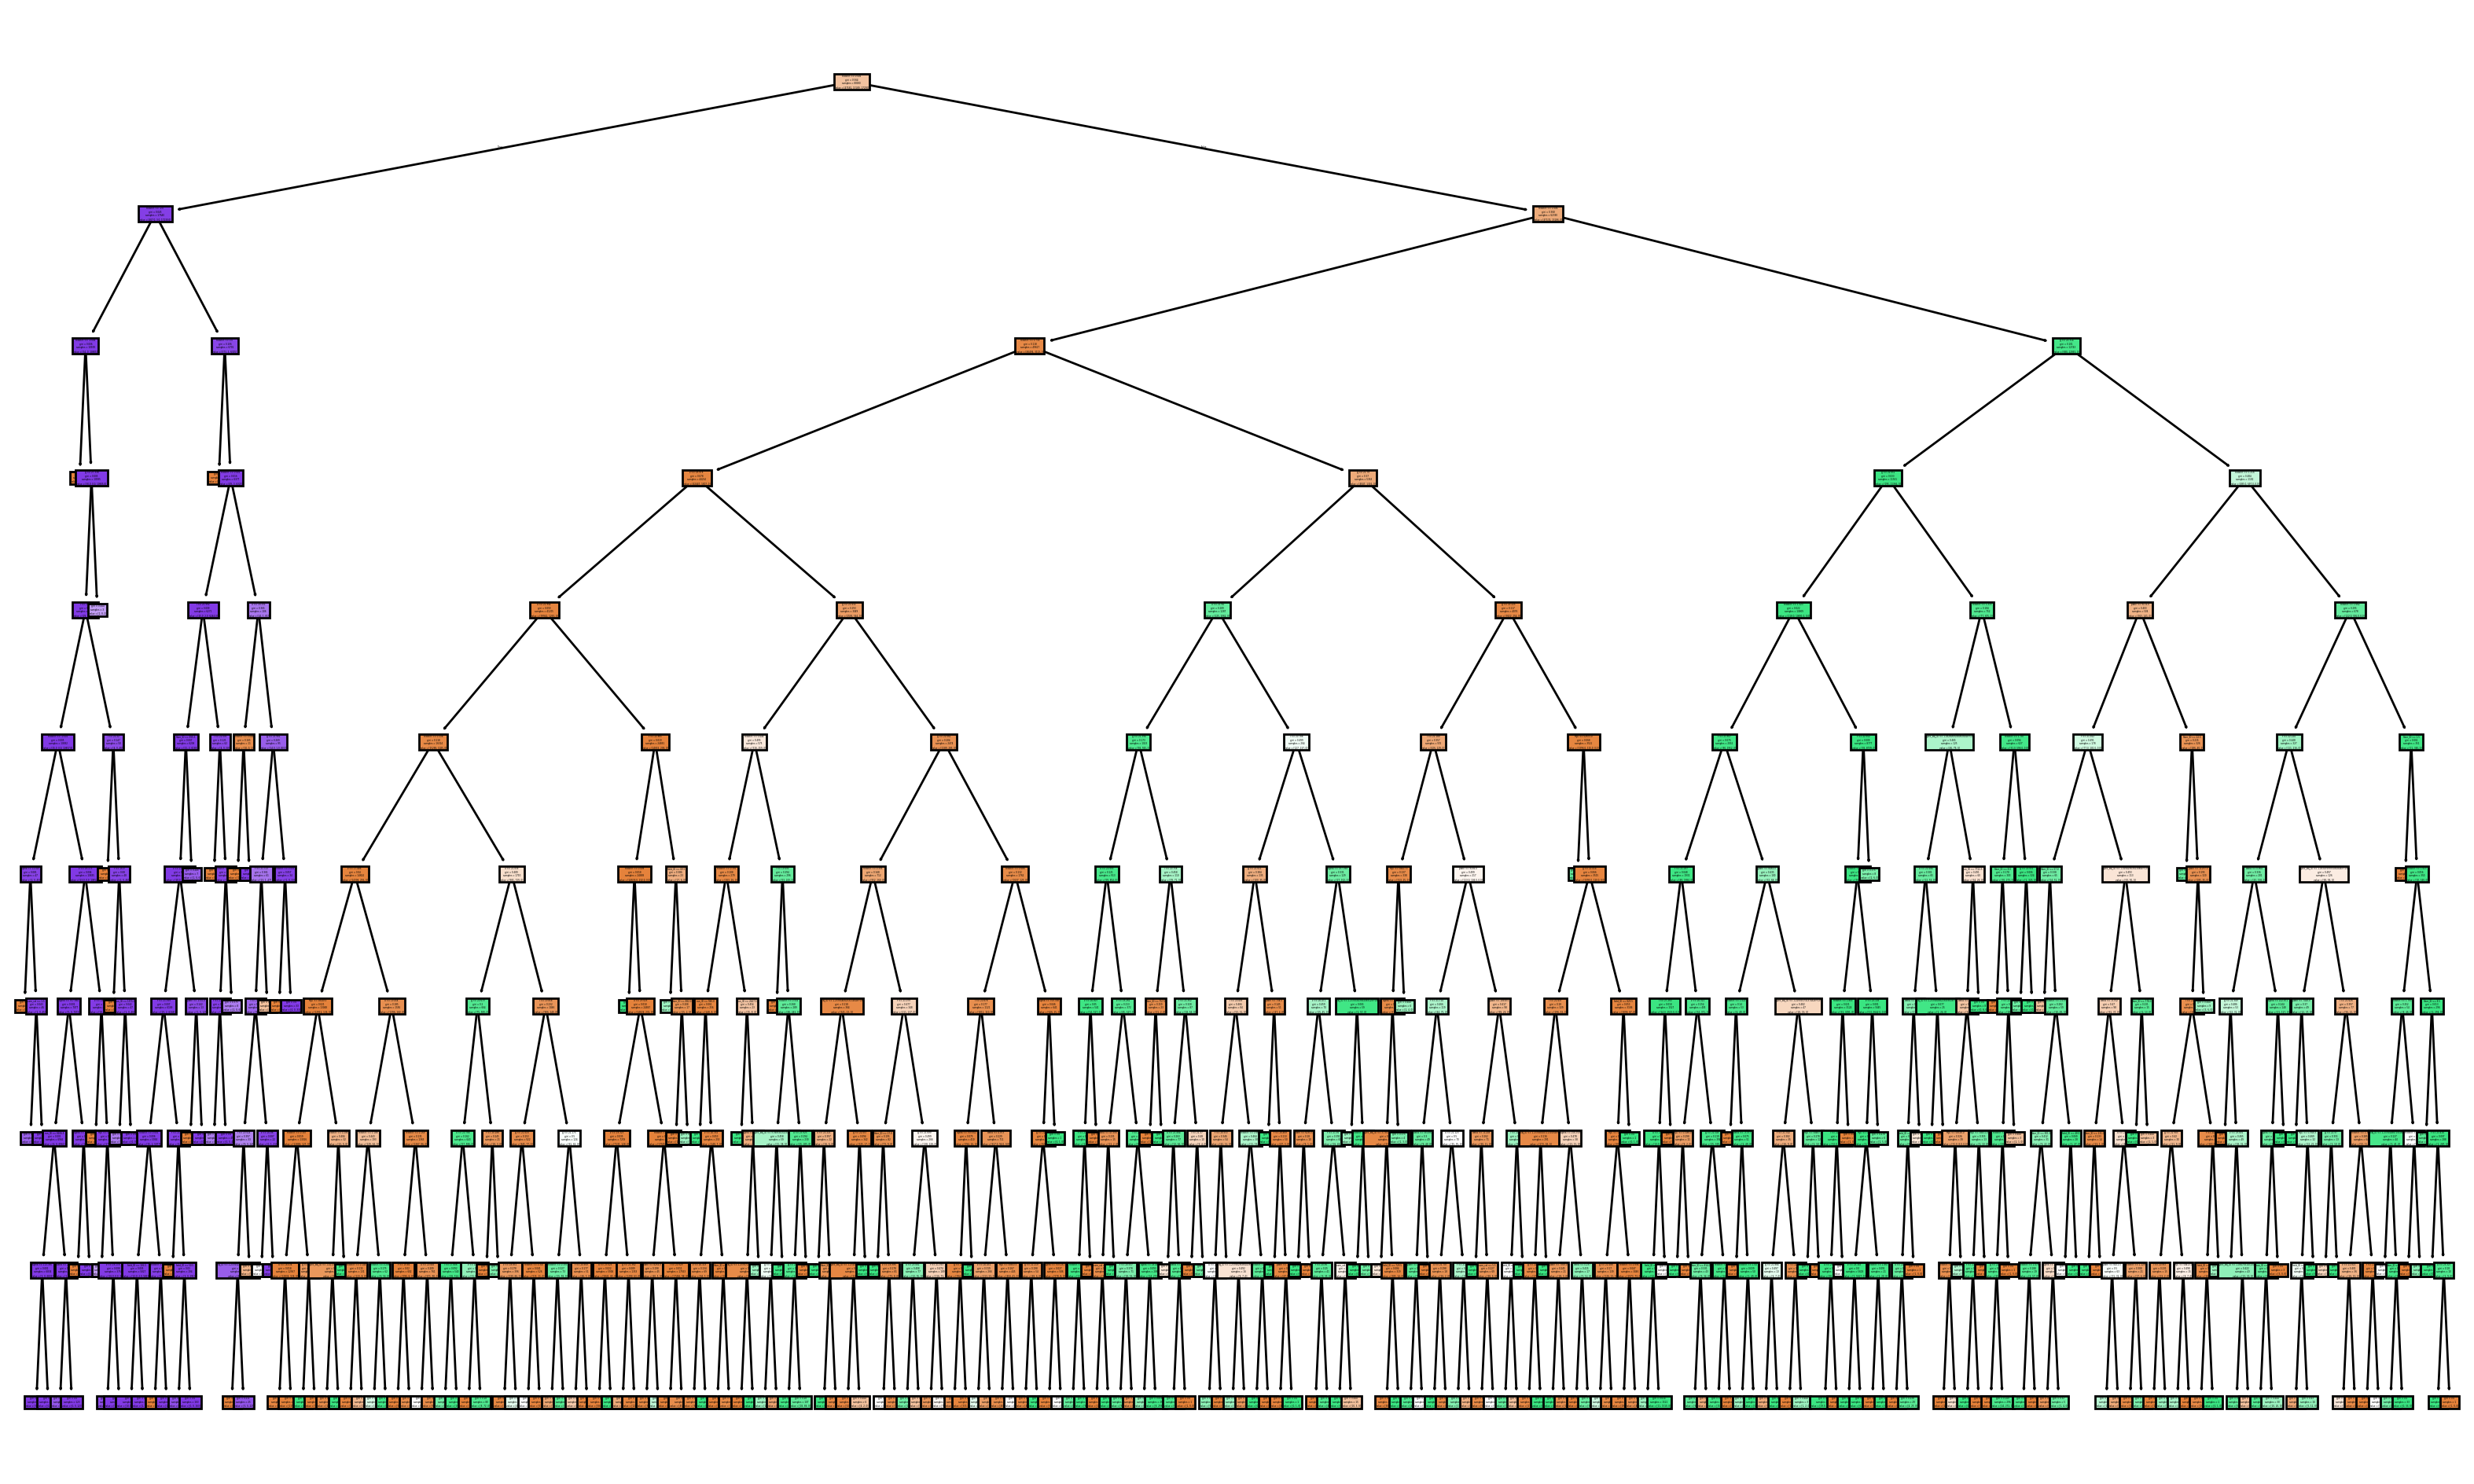

In [ ]:

plt.figure(figsize=(20,12),dpi=200)
plot_tree(dt,feature_names=X.columns,filled=True);

This is a Tree Representation of how the Decision Tree in working.

# Random Forest Classification

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=15,         # prevent overfitting
    min_samples_split=5,
    random_state=42,
    class_weight="balanced"   # handle imbalance between Star/Galaxy/QSO
)

rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
pred_rfc=rfc.predict(X_test)

In [ ]:
pred_rfc

array(['QSO', 'STAR', 'GALAXY', ..., 'GALAXY', 'STAR', 'QSO'],
      dtype=object)

In [ ]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11864
         QSO       0.95      0.94      0.95      3772
        STAR       0.99      1.00      0.99      4364

    accuracy                           0.98     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



# SVM

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train_scaled, y_train)


SVC(random_state=42)

In [ ]:
y_pred = svc.predict(X_test_scaled)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.97     11864
         QSO       0.97      0.89      0.93      3772
        STAR       0.95      0.98      0.96      4364

    accuracy                           0.96     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000



# Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(
    n_estimators=200,    # number of boosting stages (trees)
    learning_rate=0.1,   # shrinkage step
    max_depth=5,         # depth of individual trees
    random_state=101
)
gb.fit(X_train, y_train)

y_preds = gb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11864
         QSO       0.96      0.93      0.94      3772
        STAR       1.00      1.00      1.00      4364

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



# ADA Boost

In [ ]:

base_estimator = DecisionTreeClassifier(max_depth=3)

ada = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

ada.fit(X_train, y_train)

y_ada_pred = ada.predict(X_test)

In [ ]:
print(classification_report(y_test,y_ada_pred))

              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11864
         QSO       0.96      0.92      0.94      3772
        STAR       1.00      1.00      1.00      4364

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



# XG Boost

In [ ]:
xgb = XGBClassifier(
    n_estimators=300,      # number of boosting rounds
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # depth of each tree
    subsample=0.8,         # fraction of data for each tree
    colsample_bytree=0.8,  # fraction of features for each tree
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

In [ ]:

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb.fit(X_train, y_train_encoded)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:33:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_xg= xgb.predict(X_test)

In [ ]:
print(classification_report(y_test_encoded,y_pred_xg))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11864
           1       0.96      0.93      0.94      3772
           2       0.99      1.00      0.99      4364

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



# Conclusion

This project demonstrates that machine learning can reliably classify stellar objects using photometric features from survey data. By leveraging modern ensemble methods, we can automate the process of distinguishing stars, galaxies, and quasars with high accuracy, making it a valuable tool for large-scale astronomical surveys.

Future work can include deep learning approaches (e.g. neural networks on spectral data), unsupervised clustering for anomaly detection, and deployment of models in real-time pipelines for astronomical observatories.


We successfully classified Stars, Galaxies, and Quasars using photometric features from the Stellar dataset.
By performing EDA, preprocessing, and feature engineering (color indices), we improved class separability.
Among the tested models, tree-based ensembles performed best, with XGBoost achieving the highest accuracy and efficiency on 1 lakh rows.
This project shows that machine learning can effectively automate stellar object detection, supporting large-scale astronomical surveys.